# Modelo con redes neuronales simples #

Found 300000 images belonging to 5 classes.
Found 50000 images belonging to 5 classes.
Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 121s 383ms/step - accuracy: 0.6808 - loss: 0.7648 - val_accuracy: 0.9119 - val_loss: 0.2156
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 111s 355ms/step - accuracy: 0.9252 - loss: 0.1884 - val_accuracy: 0.9312 - val_loss: 0.1726
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 109s 349ms/step - accuracy: 0.9450 - loss: 0.1327 - val_accuracy: 0.9563 - val_loss: 0.1063
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 121s 388ms/step - accuracy: 0.9511 - loss: 0.1176 - val_accuracy: 0.9375 - val_loss: 0.1320
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 115s 369ms/step - accuracy: 0.9684 - loss: 0.0818 - val_accuracy: 0.9244 - val_loss: 0.1955
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 108s 346ms/step - accuracy: 0.9697 - loss: 0.0735 - val_accuracy: 0.9737 - val_loss: 0.0608
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 98s 316ms/step - accuracy: 0.9704 - loss: 0.0701 - val_accuracy: 0.9781 - val_los

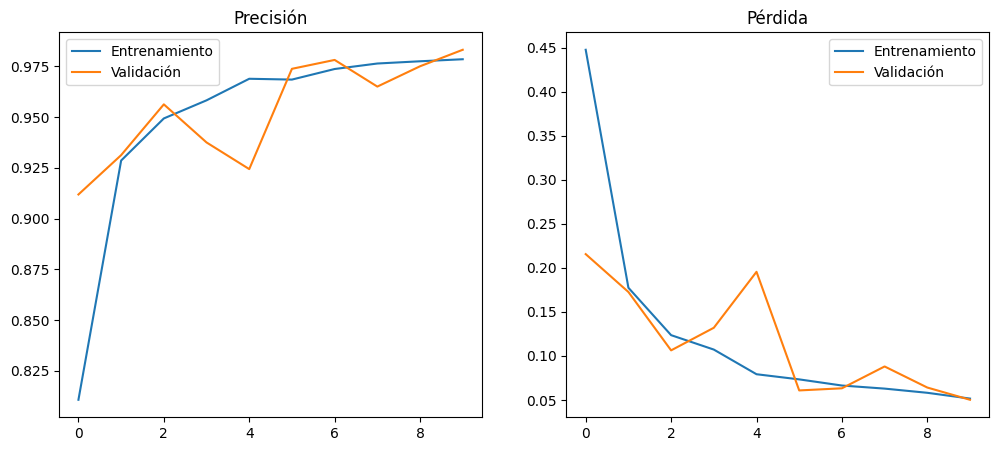

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = "C:\\Users\\ASUS TUF\\Downloads\\Data Science\\Lab 3\\3\\PolyMNIST\\MMNIST\\train"
test_dir = "C:\\Users\\ASUS TUF\\Downloads\\Data Science\\Lab 3\\3\\PolyMNIST\\MMNIST\\test"

IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=312,
    epochs=10,
    validation_data=test_generator,
    validation_steps=50 
)

loss, accuracy = model.evaluate(test_generator)
print(f'\nPrecisión en datos de prueba: {accuracy:.4f}')

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()

plt.show()
